<a href="https://colab.research.google.com/github/Anup8777/TensorFlow_DeepLearning/blob/master/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import tensorflow as tf
from tensorflow.keras import layers as layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import Adam
import tensorboard
import datetime
import warnings
import os
from sklearn import metrics

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
logdir = os.path.join("logs", datetime.datetime.now( ).strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
warnings.filterwarnings('ignore')

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [109]:
img_rows = x_train[0].shape[0]
img_cols = x_test[0].shape[1]

x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
in_shape = (img_rows, img_cols, 1) 

(28, 28, 1)

In [0]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), strides=(1, 1), input_shape=in_shape ),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(10, activation='softmax')])

In [0]:
model.compile(optimizer='Adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics='accuracy')

In [0]:
BATCH_SIZE = 128
EPOCHS = 30

In [113]:
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs = EPOCHS, verbose=1, callbacks= [tensorboard_callback], validation_split=0.8, shuffle=True )

Epoch 1/200
94/94 [==============================] - 9s 93ms/step - loss: 4.2273 - accuracy: 0.8280 - val_loss: 1.6175 - val_accuracy: 0.8881
Epoch 2/200
94/94 [==============================] - 9s 91ms/step - loss: 0.8930 - accuracy: 0.9197 - val_loss: 1.1299 - val_accuracy: 0.9064
Epoch 3/200
94/94 [==============================] - 9s 91ms/step - loss: 0.5325 - accuracy: 0.9398 - val_loss: 0.9536 - val_accuracy: 0.9142
Epoch 4/200
94/94 [==============================] - 9s 90ms/step - loss: 0.3514 - accuracy: 0.9520 - val_loss: 0.8754 - val_accuracy: 0.9188
Epoch 5/200
94/94 [==============================] - 8s 87ms/step - loss: 0.2372 - accuracy: 0.9627 - val_loss: 0.7761 - val_accuracy: 0.9244
Epoch 6/200
94/94 [==============================] - 8s 86ms/step - loss: 0.1574 - accuracy: 0.9721 - val_loss: 0.7432 - val_accuracy: 0.9310
Epoch 7/200
94/94 [==============================] - 8s 89ms/step - loss: 0.1534 - accuracy: 0.9707 - val_loss: 0.7484 - val_accuracy: 0.9279
Epoch 

In [114]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                54090     
Total params: 54,250
Trainable params: 54,250
Non-trainable params: 0
_________________________________________________________________


In [0]:
y_hat = model.predict(x_test, batch_size=32)

In [155]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 2.9926 - accuracy: 0.9507


[2.9925537109375, 0.9506999850273132]

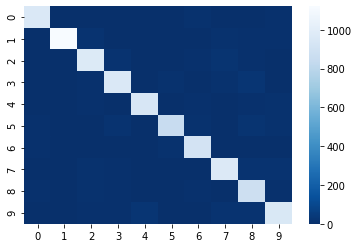

In [156]:
sns.heatmap(tf.math.confusion_matrix(y_hat.argmax(axis=1), y_test ), cmap='Blues_r')

In [157]:
tf.math.confusion_matrix(y_hat.argmax(axis=1), y_test )

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    3,    1,    1,    1,    3,   10,    0,    3,    6],
       [   0, 1121,   14,    1,    3,    3,    3,    9,    6,    5],
       [   3,    3,  972,   14,    4,    2,    5,   20,    7,    1],
       [   1,    4,    8,  955,    1,   11,    0,   10,   22,    2],
       [   1,    0,    8,    2,  941,    2,    7,    4,    7,   10],
       [   5,    1,    1,   17,    0,  852,   11,    0,   18,    9],
       [   6,    0,    3,    1,    3,    9,  914,    0,    2,    0],
       [   2,    1,   10,    7,    3,    4,    1,  967,   14,   16],
       [   7,    2,    9,    5,    4,    3,    5,    4,  878,    8],
       [   0,    0,    6,    7,   22,    3,    2,   14,   17,  952]],
      dtype=int32)>

In [139]:
print(metrics.classification_report(y_hat.argmax(axis=1), y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       983
           1       0.99      0.96      0.97      1165
           2       0.94      0.94      0.94      1031
           3       0.95      0.94      0.94      1014
           4       0.96      0.96      0.96       982
           5       0.96      0.93      0.94       914
           6       0.95      0.97      0.96       938
           7       0.94      0.94      0.94      1025
           8       0.90      0.95      0.92       925
           9       0.94      0.93      0.94      1023

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



(array([  14.,   35.,   93.,   28.,  109., 9551.,   58.,   30.,   65.,
          17.]),
 array([-9. , -7.3, -5.6, -3.9, -2.2, -0.5,  1.2,  2.9,  4.6,  6.3,  8. ]),
 <a list of 10 Patch objects>)

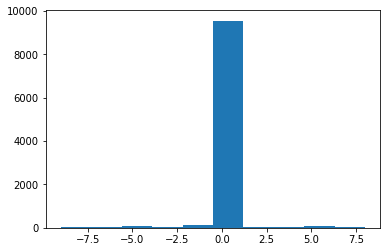

In [154]:
plt.hist((y_hat.argmax(axis=1) - y_test))